In [1]:
import numpy as np
import cv2

In [2]:
PATH = r'C:\\Users\\rjgle\\Documents\\Python Things\\ATRA differentiation\\2022.03.03 C2C12 ATRA differentiation\\ATRA 1 nM\\2022.03.03 A1 1-D.tif'

In [3]:
image = cv2.imread(PATH)
image

array([[[27,  0, 27],
        [32,  0, 32],
        [30,  0, 30],
        ...,
        [31,  0, 31],
        [31,  0, 31],
        [33,  0, 33]],

       [[27,  0, 27],
        [32,  0, 32],
        [30,  0, 30],
        ...,
        [33,  0, 33],
        [31,  0, 31],
        [32,  0, 32]],

       [[29,  0, 29],
        [29,  0, 29],
        [32,  0, 32],
        ...,
        [33,  0, 33],
        [34,  0, 34],
        [33,  0, 33]],

       ...,

       [[43,  0, 43],
        [47,  0, 47],
        [52,  0, 52],
        ...,
        [54,  0, 54],
        [56,  0, 56],
        [53,  0, 53]],

       [[38,  0, 38],
        [44,  0, 44],
        [49,  0, 49],
        ...,
        [61,  0, 61],
        [61,  0, 61],
        [61,  0, 61]],

       [[38,  0, 38],
        [42,  0, 42],
        [50,  0, 50],
        ...,
        [62,  0, 62],
        [65,  0, 65],
        [59,  0, 59]]], dtype=uint8)

(960, 1280, 3)


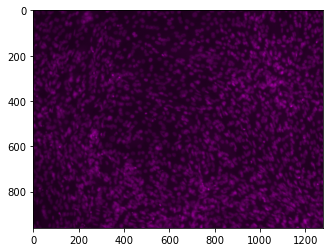

In [4]:
import matplotlib.pyplot as plt

print(image.shape)
plt.imshow(image)

In [5]:
#The images are 960x1280
#We want to break them up in 64x64 sub-images
M = 64
N = 64
tiles = [image[x:x+M,y:y+N] for x in range(0,image.shape[0],M) for y in range(0,image.shape[1],N)]
tiles

[array([[[27,  0, 27],
         [32,  0, 32],
         [30,  0, 30],
         ...,
         [28,  0, 28],
         [29,  0, 29],
         [28,  0, 28]],
 
        [[27,  0, 27],
         [32,  0, 32],
         [30,  0, 30],
         ...,
         [29,  0, 29],
         [28,  0, 28],
         [29,  0, 29]],
 
        [[29,  0, 29],
         [29,  0, 29],
         [32,  0, 32],
         ...,
         [27,  0, 27],
         [30,  0, 30],
         [31,  0, 31]],
 
        ...,
 
        [[47,  0, 47],
         [50,  0, 50],
         [52,  0, 52],
         ...,
         [50,  0, 50],
         [46,  0, 46],
         [44,  0, 44]],
 
        [[52,  0, 52],
         [50,  0, 50],
         [50,  0, 50],
         ...,
         [51,  0, 51],
         [45,  0, 45],
         [46,  0, 46]],
 
        [[52,  0, 52],
         [51,  0, 51],
         [53,  0, 53],
         ...,
         [48,  0, 48],
         [50,  0, 50],
         [44,  0, 44]]], dtype=uint8),
 array([[[29,  0, 29],
         [30,  0, 3

In [6]:
len(tiles)

300

In [7]:
#PATH TO EXPERIEMENT ONE
PATH_1 = 'C:\\Users\\rjgle\\Documents\\Python Things\\ATRA differentiation\\2022.03.03 C2C12 ATRA differentiation'
#PATH TO EXPERIMENT TWO
PATH_2 = 'C:\\Users\\rjgle\\Documents\\Python Things\\ATRA differentiation\\2022.03.21 C2C12 ATRA IGF1 Differentiation'

In [8]:
import os

#Break images up into 64x64 tiles
M = 64
N = 64

data = []

#Images in path 1
for file in os.listdir(PATH_1):
    f = os.path.join(PATH_1, file)
    if not f.endswith(".txt"):
        for filename in os.listdir(f):
                image_path = os.path.join(f, filename)
                if image_path.endswith(".tif"):
                    image = cv2.imread(image_path)
                    tiles = [image[x:x+M,y:y+N] for x in range(0,image.shape[0],M) for y in range(0,image.shape[1],N)]
                    data.append(tiles)
                    
#Images in path 2
for file in os.listdir(PATH_2):
    f = os.path.join(PATH_2, file)
    if not f.endswith(".txt"):
        for filename in os.listdir(f):
                image_path = os.path.join(f, filename)
                if image_path.endswith(".tif"):
                    image = cv2.imread(image_path)
                    tiles = [image[x:x+M,y:y+N] for x in range(0,image.shape[0],M) for y in range(0,image.shape[1],N)]
                    data.append(tiles)
                    
new_data = np.asarray(data)
new_data = np.reshape(new_data, (110100, 64, 64, 3))
new_data = np.transpose(new_data, (0,3,1,2))
new_data.shape

(110100, 3, 64, 64)

In [9]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import torch


# generate indices: instead of the actual data we pass in integers instead
train_indices, test_indices = train_test_split(
    range(len(new_data)),
    test_size=0.15,
    random_state=14
)

# generate subset based on indices
train_split = Subset(new_data, train_indices)
test_split = Subset(new_data, test_indices)

#data_train = torch.IntTensor(train_split)
#data_test = torch.IntTensor(test_split)

In [10]:
train_dataloader = DataLoader(train_split, batch_size=32, num_workers=2, shuffle=True)
test_dataloader = DataLoader(test_split, batch_size=32, num_workers=2, shuffle=True)

In [11]:
#Utility functions to un-normalize and display an image
def imshow(img):
    plt.imshow(img) 

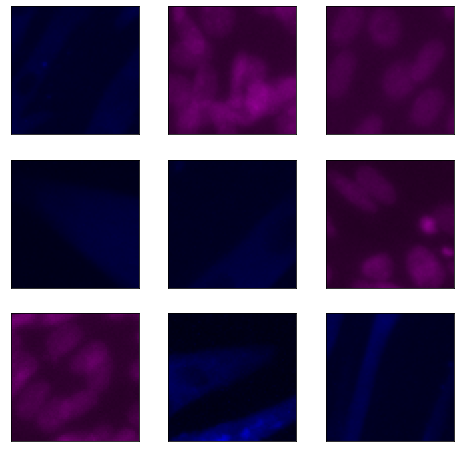

In [13]:
#Obtain one batch of training images
dataiter = iter(train_dataloader)
images = dataiter.next()
images = images.numpy() # convert images to numpy for display

#Plot the images
fig = plt.figure(figsize=(8, 8))
# display 20 images
for idx in np.arange(9):
    ax = fig.add_subplot(3, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx].transpose(1,2,0))

In [70]:
import torch.nn as nn
import torch.nn.functional as F

#Define the Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
       
        #Encoder
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
       
        #Decoder
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)


    def forward(self, x):
        x = F.relu(self.conv1(x.float()))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))
              
        return x.float()


#Instantiate the model
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [71]:
#Loss function
criterion = nn.BCELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [72]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

cpu


ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)

In [ ]:
#Epochs
n_epochs = 50

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    #Training
    for data in train_dataloader:
        images = data
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.float(), images.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
          
    train_loss = train_loss/len(train_dataloader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: -81649.233259
Epoch: 2 	Training Loss: -81649.297263
Epoch: 3 	Training Loss: -81649.147319
Epoch: 4 	Training Loss: -81649.316028
Epoch: 5 	Training Loss: -81649.314693
Epoch: 6 	Training Loss: -81649.350834
Epoch: 7 	Training Loss: -81649.375195
Epoch: 8 	Training Loss: -81649.370169
Epoch: 9 	Training Loss: -81649.396981
Epoch: 10 	Training Loss: -81649.401205
Epoch: 11 	Training Loss: -81649.405895
Epoch: 12 	Training Loss: -81649.410061
Epoch: 13 	Training Loss: -81649.411512
Epoch: 14 	Training Loss: -81649.396353
Epoch: 15 	Training Loss: -81649.421336
Epoch: 16 	Training Loss: -81649.416333
Epoch: 17 	Training Loss: -81649.426603
Epoch: 18 	Training Loss: -81649.424782
Epoch: 19 	Training Loss: -81649.429261
Epoch: 20 	Training Loss: -81649.432303
Epoch: 21 	Training Loss: -81649.370669
Epoch: 22 	Training Loss: -81649.437730
Epoch: 23 	Training Loss: -81649.430791
Epoch: 24 	Training Loss: -81648.476430
